<a href="https://colab.research.google.com/github/adrianbarrenada/APRENDIZAJE_AUTOMATICO_23_24/blob/main/prrrrrrrr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estoy sacando toda la inspiración(es decir, lo estoy copiando) de aquí:

https://www.kaggle.com/code/ademhph/handwriting-recognition-using-cnn-model

https://www.kaggle.com/code/aryantiwari123/handwriting-recognition-deep-learning-tensorflow


https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr

https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr




> ### Pasos previos

En primer lugar llamamos a todas las librerías que serán necesarias para cargar y preparar la base de datos, graficar, crear el modelo de redes neuronales, etc.

In [ ]:
# Librerías para la descarga del archivo
import zipfile
from io import BytesIO
from PIL import Image
import pandas as pd
import numpy as np
import io

#Librerías keras
import tensorflow as tf
from tensorflow import keras

#Librerías para el desarrollo de la CNN
import keras
# from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator



#Librerías para graficar
import matplotlib.pyplot as plt
import numpy as np

# Prepraracion de etiquetas
from keras import utils
from keras.utils import to_categorical

# Librerías para importar hiperparametros
from keras.optimizers import SGD

# Nuevas librerias
import os
import cv2
import imghdr
from sklearn.preprocessing import LabelBinarizer
from itertools import chain
import glob

from __future__ import division
from random import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation, BatchNormalization
#from keras.layers.convolutional import Convolution2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, RMSprop

> ### Importación

Para ello hemos creado un diccionario con el usario y el API kaggle, que nos permite acceder a cualquier base de datos de esta plataforma. También llevamos a cabo algunos pasos necesarios para la seguridad y permisos de lectura y escritura. Finalmente abrimos la base de datos en modo escritura

In [ ]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d tejasreddy/iam-handwriting-top50


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
 99% 185M/187M [00:08<00:00, 28.0MB/s]
100% 187M/187M [00:08<00:00, 23.1MB/s]


Una vez hecho esto, descomprimimos el archivo zip:

In [ ]:
!unzip iam-handwriting-top50.zip -d /content/iam-handwriting-top50

Archive:  iam-handwriting-top50.zip
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-00.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-01.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-02.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-03.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s01-00.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s01-01.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s01-02.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s01-03.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-003u-s00-00.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_subset/a01-003u-s00-01.png  
  inflating: /content/iam-handwriting-top50/data_subset/data_sub

In [ ]:
d = {}
import pandas as pd

# Actualiza esta ruta para reflejar la ubicación real del archivo descomprimido
forms_file_path = '/content/iam-handwriting-top50/forms_for_parsing.txt'

with open(forms_file_path) as f:
    for line in f:
        parts = line.strip().split(' ')
        if len(parts) >= 2:  # Asegúrate de que la línea tenga al menos 2 partes
            key, writer = parts[0], parts[1]
            d[key] = writer

print(len(d.keys()))


1539


In [ ]:

tmp = []
target_list = []

# Asegúrate de que este patrón coincida con los archivos que deseas (por ejemplo, "*.jpg" para imágenes JPEG)
path_to_files = os.path.join('/content/iam-handwriting-top50/data_subset/data_subset', '*')

# Asegúrate de que estamos recogiendo archivos y no directorios
for filename in sorted(glob.glob(path_to_files)):
    if os.path.isfile(filename):  # Esto verifica que sea un archivo
        tmp.append(filename)
        image_name = os.path.basename(filename)
        file, ext = os.path.splitext(image_name)

        parts = file.split('-')
        if len(parts) >= 2:
            form = '-'.join(parts[:2])
            if form in d:
                target_list.append(str(d[form]))

img_files = np.asarray(tmp)
img_targets = np.asarray(target_list)
print(img_files.shape)
print(img_targets.shape)


(4899,)
(4899,)


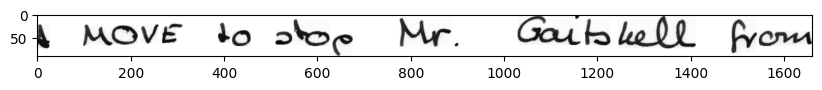

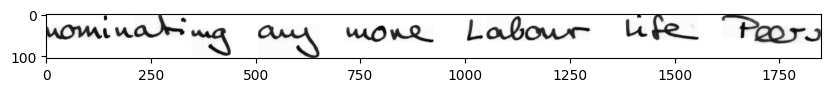

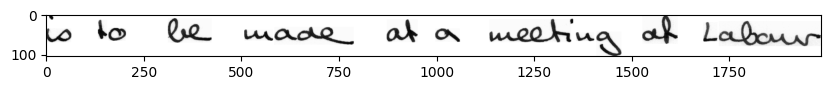

In [ ]:
import matplotlib.image as mpimg
for filename in img_files[:3]:
    img=mpimg.imread(filename)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap ='gray')

In [ ]:
encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_Y = encoder.transform(img_targets)

print(img_files[:5], img_targets[:5], encoded_Y[:5])

['/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-00.png'
 '/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-01.png'
 '/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-02.png'
 '/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-03.png'
 '/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s01-00.png'] ['000' '000' '000' '000' '000'] [0 0 0 0 0]


Aqui estamos pasando los datos una carpeta nueva nuestra

In [ ]:
train_files, rem_files, train_targets, rem_targets = train_test_split(
        img_files, encoded_Y, train_size=0.66, random_state=52, shuffle= True)

validation_files, test_files, validation_targets, test_targets = train_test_split(
        rem_files, rem_targets, train_size=0.5, random_state=22, shuffle=True)

print(train_files.shape, validation_files.shape, test_files.shape)
print(train_targets.shape, validation_targets.shape, test_targets.shape)

(3233,) (833,) (833,)
(3233,) (833,) (833,)


y ahora cargamos los datos

In [ ]:
# Generator function for generating random crops from each sentence

# # Now create generators for randomly cropping 113x113 patches from these images

batch_size = 8 #16
num_classes = 50

# Start with train generator shared in the class and add image augmentations
def generate_data(samples, target_files,  batch_size=batch_size, factor = 0.1 ):
    num_samples = len(samples)
    from sklearn.utils import shuffle
    while 1: # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            batch_targets = target_files[offset:offset+batch_size]

            images = []
            targets = []
            for i in range(len(batch_samples)):
                batch_sample = batch_samples[i]
                batch_target = batch_targets[i]
                im = Image.open(batch_sample)
                cur_width = im.size[0]
                cur_height = im.size[1]

                # print(cur_width, cur_height)
                height_fac = 113 / cur_height

                new_width = int(cur_width * height_fac)
                size = new_width, 113

                imresize = im.resize((size), Image.ANTIALIAS)  # Resize so height = 113 while keeping aspect ratio
                now_width = imresize.size[0]
                now_height = imresize.size[1]
                # Generate crops of size 113x113 from this resized image and keep random 10% of crops

                avail_x_points = list(range(0, now_width - 113 ))# total x start points are from 0 to width -113

                # Pick random x%
                pick_num = int(len(avail_x_points)*factor)

                # Now pick
                random_startx = sample(avail_x_points,  pick_num)

                for start in random_startx:
                    imcrop = imresize.crop((start, 0, start+113, 113))
                    images.append(np.asarray(imcrop))
                    targets.append(batch_target)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(targets)

            #reshape X_train for feeding in later
            X_train = X_train.reshape(X_train.shape[0], 113, 113, 1)
            #convert to float and normalize
            X_train = X_train.astype('float32')
            X_train /= 255

            #One hot encode y
            y_train = to_categorical(y_train, num_classes)
            yield shuffle(X_train, y_train)

Ahora eliminamos los datos no válidos, que en esta base aparecen asi:  IDENTITY = UNREADABLE

In [ ]:
train_generator = generate_data(train_files, train_targets, batch_size=batch_size, factor = 0.3)
validation_generator = generate_data(validation_files, validation_targets, batch_size=batch_size, factor = 0.3)
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor = 0.1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, Lambda, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

def resize_image(image):
    return tf.image.resize(image, [56, 56])

# Dimensiones de la imagen de entrada
row, col, ch = 113, 113, 1

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(row, col, ch)))

# Redimensionar datos dentro de la red neuronal
model.add(Lambda(resize_image))  # Redimensionar imágenes para facilitar el cálculo

# Modelo CNN - Construyendo el modelo sugerido en el paper

model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), padding='same', name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='pool1'))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='pool2'))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', name='conv3'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='pool3'))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Asegúrate de definir 'num_classes' correctamente
num_classes = 50  # Por ejemplo, para un problema de clasificación de 50 clases
model.add(Dense(num_classes, name='output'))
model.add(Activation('softmax'))  # Softmax ya que la salida está dentro de 50 clases

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 115, 115, 1)       0         
 g2D)                                                            
                                                                 
 lambda (Lambda)             (None, 56, 56, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                                        

> ### Entrenamiento del modelo

In [ ]:
nb_epoch = 8

samples_per_epoch = 3268
nb_val_samples = 842

# #save every model using Keras checkpoint
from keras.callbacks import ModelCheckpoint
#filepath="check-{epoch:02d}-{val_loss:.4f}.hdf5"
filepath="low_loss.hdf5"
checkpoint = ModelCheckpoint(filepath= filepath, verbose=1, save_best_only=False)
callbacks_list = [checkpoint]

# #Model fit generator
history_object = model.fit_generator(train_generator, steps_per_epoch = samples_per_epoch/batch_size,
                                      validation_data=validation_generator,
                                      validation_steps=nb_val_samples, epochs=nb_epoch, verbose=1, callbacks=callbacks_list)

<ipython-input-12-fb0173b283c5>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_object = model.fit_generator(train_generator, steps_per_epoch = samples_per_epoch/batch_size,
<ipython-input-9-25774654e0fd>:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS)  # Resize so height = 113 while keeping aspect ratio


Epoch 1/8
409/408 [==============================] - ETA: -1s - loss: 3.6530 - accuracy: 0.2074
Epoch 1: saving model to low_loss.hdf5
408/408 [==============================] - 1456s 4s/step - loss: 3.6530 - accuracy: 0.2074 - val_loss: 3.5411 - val_accuracy: 0.2176
Epoch 2/8


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


409/408 [==============================] - ETA: 0s - loss: 3.1755 - accuracy: 0.2279
Epoch 2: saving model to low_loss.hdf5
408/408 [==============================] - 548s 1s/step - loss: 3.1755 - accuracy: 0.2279 - val_loss: 2.5858 - val_accuracy: 0.3008
Epoch 3/8
409/408 [==============================] - ETA: 0s - loss: 2.5257 - accuracy: 0.2940
Epoch 3: saving model to low_loss.hdf5
408/408 [==============================] - 548s 1s/step - loss: 2.5257 - accuracy: 0.2940 - val_loss: 2.1752 - val_accuracy: 0.3712
Epoch 4/8
409/408 [==============================] - ETA: 0s - loss: 2.1672 - accuracy: 0.3696
Epoch 4: saving model to low_loss.hdf5
408/408 [==============================] - 561s 1s/step - loss: 2.1672 - accuracy: 0.3696 - val_loss: 1.8437 - val_accuracy: 0.4431
Epoch 5/8
409/408 [==============================] - ETA: 0s - loss: 1.9321 - accuracy: 0.4288
Epoch 5: saving model to low_loss.hdf5
408/408 [==============================] - 545s 1s/step - loss: 1.9321 - accur

In [ ]:
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor=0.1)
test_steps = np.ceil(len(test_files) / batch_size)
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
# Asume que 'generate_data', 'test_files', 'test_targets', y 'batch_size' ya están definidos
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor=0.1)
test_steps = np.ceil(len(test_files) / batch_size)

# Evalúa el modelo
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


<ipython-input-9-25774654e0fd>:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imresize = im.resize((size), Image.ANTIALIAS)  # Resize so height = 113 while keeping aspect ratio


105/105 [==============================] - 39s 366ms/step - loss: 1.2375 - accuracy: 0.6153
Test Loss: 1.2375057935714722
Test Accuracy: 0.615281343460083
105/105 [==============================] - 17s 167ms/step - loss: 1.2359 - accuracy: 0.6156
Test Loss: 1.2359410524368286
Test Accuracy: 0.6156284213066101


#### ESTA ES LA DE CLASIFICACION

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 1s 0us/step


In [ ]:

print(train_labels)
train_labels[0] # Crítica positiva

[1 0 0 ... 0 1 0]


1

In [ ]:

# Ningún índice de palabras excederá las 10K palabras porque solo usamos las 10K
# más frecuentes
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# word_index es el diccionario que mapea cada palabra con un ínidice entero
word_index = imdb.get_word_index()
# print(word_index)
# Lo invertimos, asignando índices de enteros a palabras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# print(reverse_word_index)
# Decodificamos la crítica. Los índices están desviados en 3, porque 0, 1 y 2
# están reservados para "relleno", "inicio de secuencia" y "desconocido"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


1641221/1641221 [==============================] - 1s 0us/step


In [ ]:

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Crea matriz de ceros con la forma (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Pasa índices específicos de results[i] a 1s
    return results

# Datos de entrenamiento vectorizados
x_train = vectorize_sequences(train_data)
# Datos de prueba vectorizados
x_test = vectorize_sequences(test_data)

In [ ]:

x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:

# Convertimos el vector de etiquetas en un tensor Numpy de coma flotante
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (10000 valores)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.5272 - acc: 0.7719 - val_loss: 0.4214 - val_acc: 0.8332
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3254 - acc: 0.8948 - val_loss: 0.3442 - val_acc: 0.8615
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2476 - acc: 0.9201 - val_loss: 0.2951 - val_acc: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2004 - acc: 0.9353 - val_loss: 0.2780 - val_acc: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1670 - acc: 0.9455 - val_loss: 0.2792 - val_acc: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1419 - acc: 0.9553 - val_loss: 0.2818 - val_acc: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1226 - acc: 0.9627 - val_loss: 0.2925 - val_acc: 0.8840
Epoch 8/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1057 - a

In [ ]:

history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['acc'])
print(history_dict['val_loss'])
print(history_dict['val_acc'])


[0.5272067785263062, 0.32540592551231384, 0.24755580723285675, 0.20042486488819122, 0.16696295142173767, 0.14194408059120178, 0.1226339116692543, 0.10574556142091751, 0.09124834835529327, 0.07901615649461746, 0.06542398780584335, 0.059785954654216766, 0.047302454710006714, 0.04164706543087959, 0.03519285470247269, 0.031341634690761566, 0.02509436011314392, 0.02075326256453991, 0.018658440560102463, 0.013859083876013756]
[0.7719333171844482, 0.8948000073432922, 0.9201333522796631, 0.9352666735649109, 0.9454666376113892, 0.9552666544914246, 0.9626666903495789, 0.9688000082969666, 0.9746000170707703, 0.9781333208084106, 0.9843999743461609, 0.9851999878883362, 0.989466667175293, 0.9917333126068115, 0.9938666820526123, 0.994533360004425, 0.9961333274841309, 0.9972666501998901, 0.9973999857902527, 0.9988666772842407]
[0.4213564395904541, 0.34423357248306274, 0.2951333522796631, 0.27797386050224304, 0.27918514609336853, 0.2817780077457428, 0.2924787998199463, 0.35690122842788696, 0.3246354162

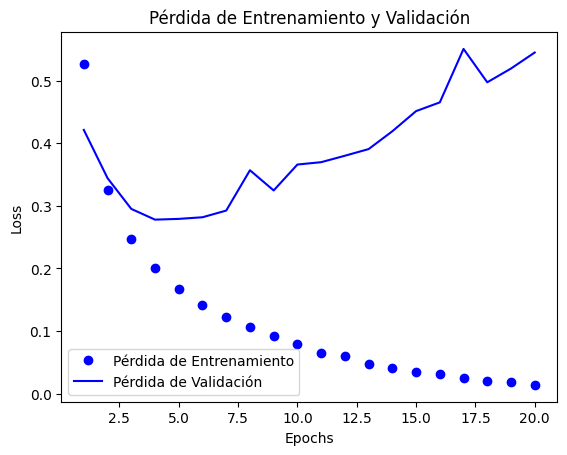

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

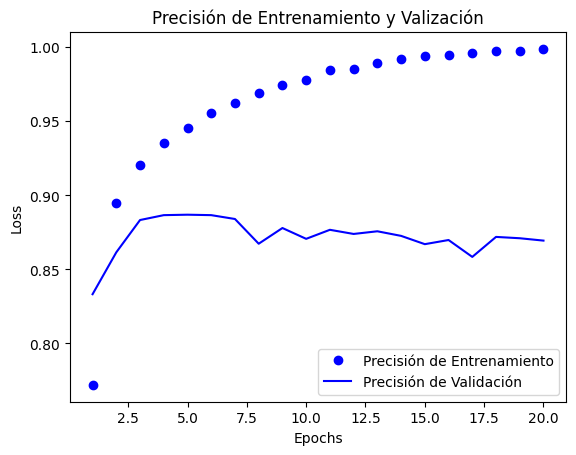

In [ ]:
plt.clf()   # Limpia la figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.4986 - accuracy: 0.8110
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.3002 - accuracy: 0.8948
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2323 - accuracy: 0.9163
Epoch 4/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1969 - accuracy: 0.9285


In [ ]:

results

In [ ]:

model.predict(x_test)

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Pérdida con los datos de test:", test_loss)
print("Precisión con los datos de test:", test_acc)